# Summative Assessment - Data Analytics and Visualization

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [969]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [970]:
# Import the libraries you'll be using and load the data into a pandas dataframe here
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import random as rnd
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm


In [971]:
#Reading the .csv file and parsing Date and Time into a Date_Time column
df = pd.read_csv(file_path, sep=',', parse_dates=[['Date', 'Time']])

In [972]:
#Check for rows containing '?'  and show results
filtered = df[df.Global_active_power.isin(['?'])]
filtered

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
19836,2007-01-14 18:36:00,?,?,?,?,?,?,NaN
39913,2007-01-28 17:13:00,?,?,?,?,?,?,NaN
76258,2007-02-22 22:58:00,?,?,?,?,?,?,NaN
76259,2007-02-22 22:59:00,?,?,?,?,?,?,NaN
120592,2007-03-25 17:52:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...
230070,2007-09-06 18:30:00,?,?,?,?,?,?,NaN
230071,2007-09-06 18:31:00,?,?,?,?,?,?,NaN
244094,2007-06-19 12:14:00,?,?,?,?,?,?,NaN
244095,2007-06-19 12:15:00,?,?,?,?,?,?,NaN


Based on the Table above we can state that there are 3771 rows containing question marks '?' . We need to clean those out. 
Having a look at null values or NaN values with the isnull() function, there are also 3771 rows having NaN values! Coincidence? 

In [973]:
df.isnull().sum(axis=0) #Inspect for any missing data 

Date_Time                   0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

We will now drop all rows having NaN values and after that inspect to see if there are any '?' marks left. If not, we have achieved our goal to clean all rows with '?' values. 

In [974]:
#Counting the number of rows with NaN values in anther way (to score some more points :-) 
howmany = len(df) - len(df.dropna(how='any',axis=0)) 
howmany

3771

In [975]:
df.shape # Check number of Rows and Columns in the dataset

(260640, 8)

In [976]:
dfcleaned = df.copy()
dfcleaned = dfcleaned.dropna(how='any',axis=0)  # Drop all rows with Null values and read into 

In [977]:
AnyQuestMarksLeft = len(dfcleaned[dfcleaned.Global_active_power.isin(['?'])]) #Count rows having '?' 
AnyQuestMarksLeft

0

By cleaning all rows with NaN values we have also removed all rows with '?' - as per above statement there is zero rows left with Question Mark(s)

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [978]:
# Look at the data you've loaded
dfcleaned.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-01 00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,2007-01-01 00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2007-01-01 00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,2007-01-01 00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,2007-01-01 00:04:00,2.554,0.1,241.98,10.4,0,0,0.0


Taking a look at the data types we are dealig with it is clear that this will need some adjustment. We will do relevant conversions in the next step.

In [979]:
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256869 entries, 0 to 260639
Data columns (total 8 columns):
Date_Time                256869 non-null datetime64[ns]
Global_active_power      256869 non-null object
Global_reactive_power    256869 non-null object
Voltage                  256869 non-null object
Global_intensity         256869 non-null object
Sub_metering_1           256869 non-null object
Sub_metering_2           256869 non-null object
Sub_metering_3           256869 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 17.6+ MB


In [980]:
#Convert colums to float 
dfcleaned['Global_reactive_power'] = dfcleaned['Global_reactive_power'].astype('float')
dfcleaned['Global_active_power'] = dfcleaned['Global_active_power'].astype('float')
dfcleaned['Voltage'] = dfcleaned['Voltage'].astype('float')
dfcleaned['Global_intensity'] = dfcleaned['Global_intensity'].astype('float')
dfcleaned['Sub_metering_1'] = dfcleaned['Sub_metering_1'].astype('float')
dfcleaned['Sub_metering_2'] = dfcleaned['Sub_metering_2'].astype('float')

In [981]:
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256869 entries, 0 to 260639
Data columns (total 8 columns):
Date_Time                256869 non-null datetime64[ns]
Global_active_power      256869 non-null float64
Global_reactive_power    256869 non-null float64
Voltage                  256869 non-null float64
Global_intensity         256869 non-null float64
Sub_metering_1           256869 non-null float64
Sub_metering_2           256869 non-null float64
Sub_metering_3           256869 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 17.6 MB


In [982]:
dfcleaned.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


In [983]:
# It's nice seeing day of the week as a word - so I'll add that as a column
import calendar
dfcleaned['Day_name'] = [calendar.day_name[x] for x in dfcleaned.Date_Time.dt.dayofweek]

In [984]:
dfcleaned.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_name
0,2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,Monday
1,2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,Monday
2,2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,Monday
3,2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,Monday
4,2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,Monday


In [985]:
dfcleaned.shape

(256869, 9)

Text(0.5, 0, 'Year-Month')

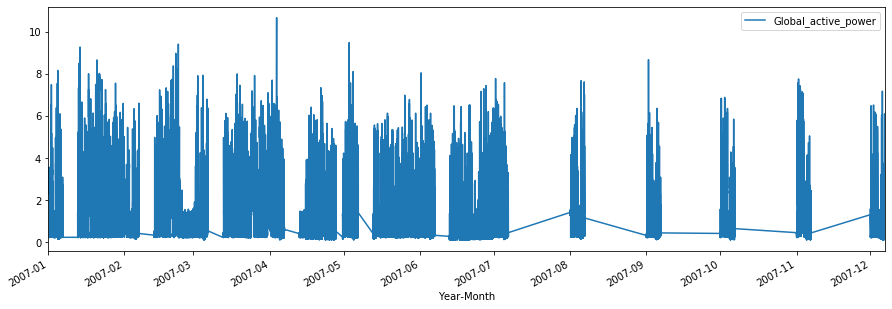

In [986]:
#Check out the Global Active power consumtion
ax = dfcleaned.plot(x='Date_Time', y='Global_active_power', figsize=(15, 5))
ax.set_xlabel("Year-Month")

Text(0.5, 0, 'Year-Month')

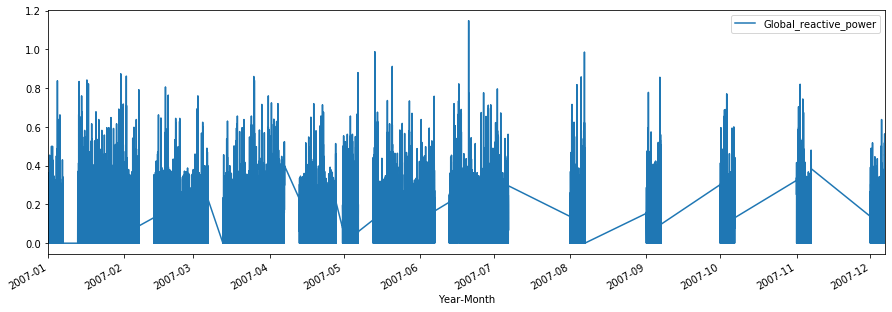

In [987]:
#Check out the Gloabl Reactive power consumtion
ax = dfcleaned.plot(x='Date_Time', y='Global_reactive_power', figsize=(15, 5))
ax.set_xlabel("Year-Month")

Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [988]:
# Answer here
First1000Rows = dfcleaned.head(1000)
First1000Rows

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_name
0,2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,Monday
1,2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,Monday
2,2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,Monday
3,2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,Monday
4,2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,Monday
...,...,...,...,...,...,...,...,...,...
995,2007-01-01 16:35:00,1.354,0.130,239.72,5.6,0.0,0.0,17.0,Monday
996,2007-01-01 16:36:00,1.366,0.136,240.95,5.6,0.0,0.0,18.0,Monday
997,2007-01-01 16:37:00,1.368,0.138,241.16,5.6,0.0,0.0,18.0,Monday
998,2007-01-01 16:38:00,1.372,0.140,241.61,5.6,0.0,0.0,18.0,Monday


In [989]:
Second1000Rows = dfcleaned.loc[75000:75999, :] 
Second1000Rows

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_name
75000,2007-02-22 02:00:00,2.258,0.052,238.85,9.4,0.0,0.0,0.0,Thursday
75001,2007-02-22 02:01:00,2.280,0.048,240.13,9.4,0.0,0.0,0.0,Thursday
75002,2007-02-22 02:02:00,2.286,0.046,240.42,9.4,0.0,0.0,0.0,Thursday
75003,2007-02-22 02:03:00,2.284,0.048,240.33,9.4,0.0,0.0,0.0,Thursday
75004,2007-02-22 02:04:00,2.406,0.000,240.12,10.0,0.0,0.0,0.0,Thursday
...,...,...,...,...,...,...,...,...,...
75995,2007-02-22 18:35:00,1.322,0.096,234.73,5.6,0.0,0.0,0.0,Thursday
75996,2007-02-22 18:36:00,1.562,0.092,233.84,6.6,0.0,0.0,0.0,Thursday
75997,2007-02-22 18:37:00,1.786,0.102,234.82,7.6,0.0,0.0,0.0,Thursday
75998,2007-02-22 18:38:00,1.968,0.114,234.57,8.4,0.0,0.0,0.0,Thursday


Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [990]:
# Answer here - explain your code and reasoning with extra cells for explanation.
First1000Rows.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582
min,0.204000,0.000000,235.300000,0.800000,0.0,0.000000,0.000000
25%,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,2.512000,0.114000,240.560000,10.400000,0.0,0.000000,0.000000
75%,2.602000,0.138000,241.910000,10.800000,0.0,0.000000,0.000000
max,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


In [991]:
Second1000Rows.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,1.816898,0.086158,239.824280,7.572200,0.0,0.249000,6.926000
std,1.172516,0.074981,2.088358,4.927574,0.0,0.552543,8.534833
min,0.252000,0.000000,233.840000,1.000000,0.0,0.000000,0.000000
25%,0.719000,0.046000,238.480000,3.000000,0.0,0.000000,0.000000
50%,1.560000,0.078000,239.755000,6.400000,0.0,0.000000,0.000000
75%,2.384000,0.114000,241.402500,9.800000,0.0,0.000000,17.000000
max,8.244000,0.356000,244.970000,35.000000,0.0,2.000000,18.000000


[Text(0.5, 0, '1000 rows > 75K')]

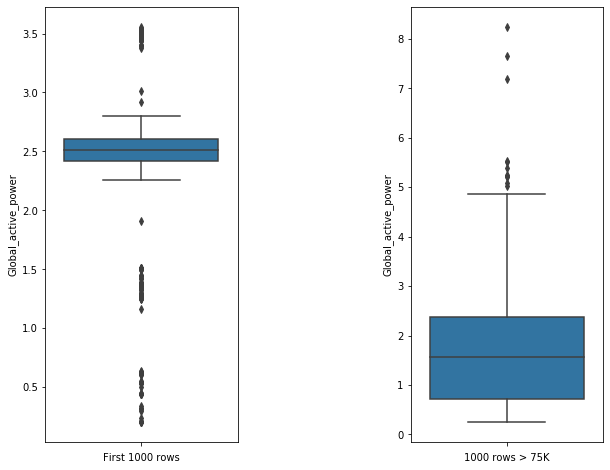

In [992]:
f, axes = plt.subplots(1,2, figsize=(10,8))  #Create four box plots
plt.subplots_adjust(wspace = 0.9)  # Increase spacing between boxes

#Plot 3 Boxplots for the different surface areas and last one as Total Surface area
box_plot1 = sns.boxplot(x='Global_active_power',data=First1000Rows,orient='v', ax=axes[0] )
box_plot1.set(xlabel='First 1000 rows')
box_plot2 = sns.boxplot(x='Global_active_power',data=Second1000Rows,orient='v', ax=axes[1] )
box_plot2.set(xlabel='1000 rows > 75K')

Looking at the Mean values across those two different sets it is clear they are not a good representation of the entire dataset.  For instance, the average or mean Global_Active_power for the first 1000 rows = 2.38 Kw while this is at 1.82Kw for the second sample set. We are looking at data which falls into one specific day for both samples. The Box-Plots above also clearly illustrates those differences and highlights the fact that these samples have a non-normal distribution and outliers in both directios. 

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [993]:
# Answer
df_small = dfcleaned.sample(n=10000, random_state=1)
df_small.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_name
223686,2007-05-06 08:06:00,1.492,0.284,231.93,6.4,0.0,1.0,16.0,Sunday
69026,2007-02-17 22:26:00,3.952,0.100,237.63,16.6,0.0,0.0,0.0,Saturday
30894,2007-01-22 10:54:00,1.280,0.000,240.14,5.2,0.0,0.0,18.0,Monday
224554,2007-05-06 22:34:00,3.258,0.228,235.72,13.8,0.0,1.0,0.0,Sunday
120122,2007-03-25 10:02:00,2.480,0.170,237.29,10.4,0.0,0.0,0.0,Sunday


In [994]:
df_small.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,1.157372,0.122710,239.269422,4.94200,1.40110,1.677200,5.731300
std,1.179309,0.112422,3.542903,4.98851,6.81195,6.701335,8.158796
min,0.084000,0.000000,224.240000,0.40000,0.00000,0.000000,0.000000
25%,0.296000,0.000000,236.770000,1.40000,0.00000,0.000000,0.000000
50%,0.542000,0.104000,239.700000,2.40000,0.00000,0.000000,0.000000
75%,1.610000,0.192000,241.830000,6.80000,0.00000,1.000000,17.000000
max,9.244000,0.966000,249.850000,41.20000,74.00000,75.000000,20.000000


We will now have a look at the data distributions for the different variables in the dataframe by plotting histograms for each variable

C:\Users\100008706\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D9A836B48>,
      dtype=object)

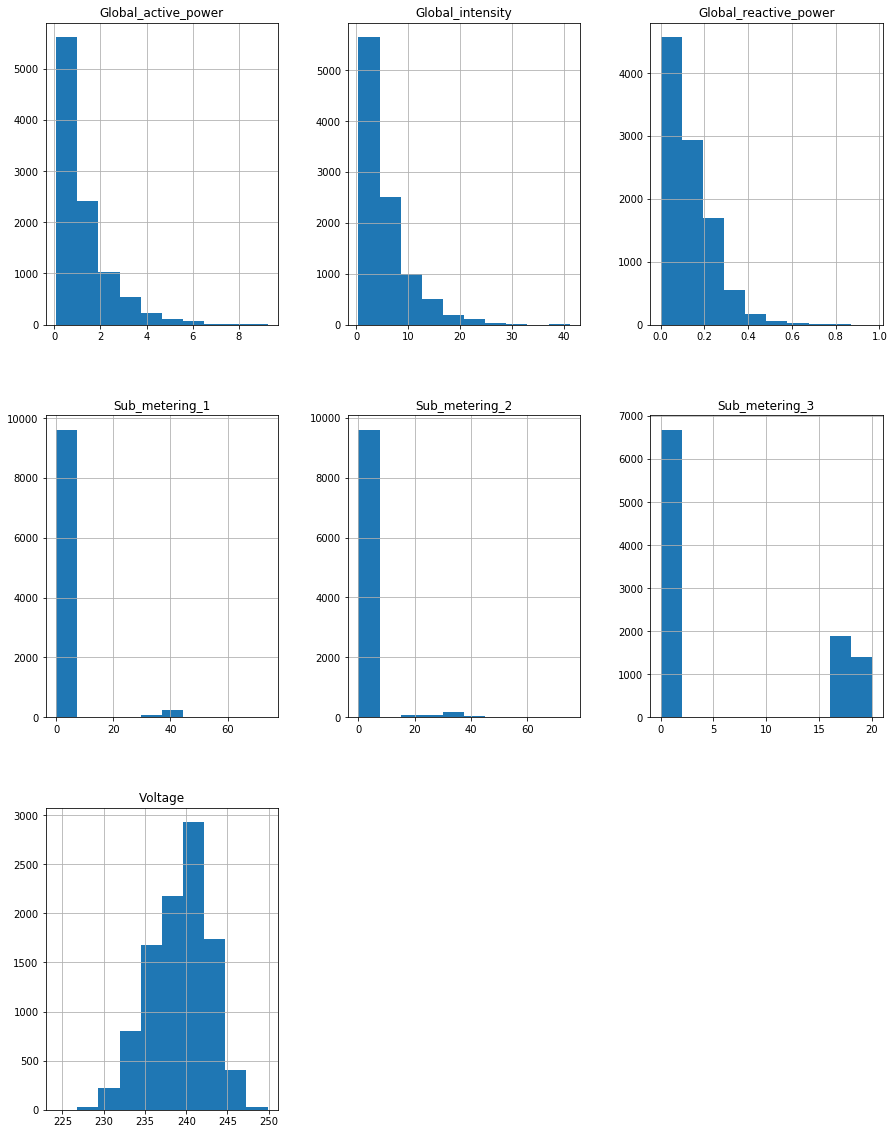

In [995]:
fig = plt.figure(figsize = (15,20)) #set the size of the plots
ax = fig.gca()  # 
df_small.hist(ax=ax)

Have a closer look at the density distribution for the Global active power variable

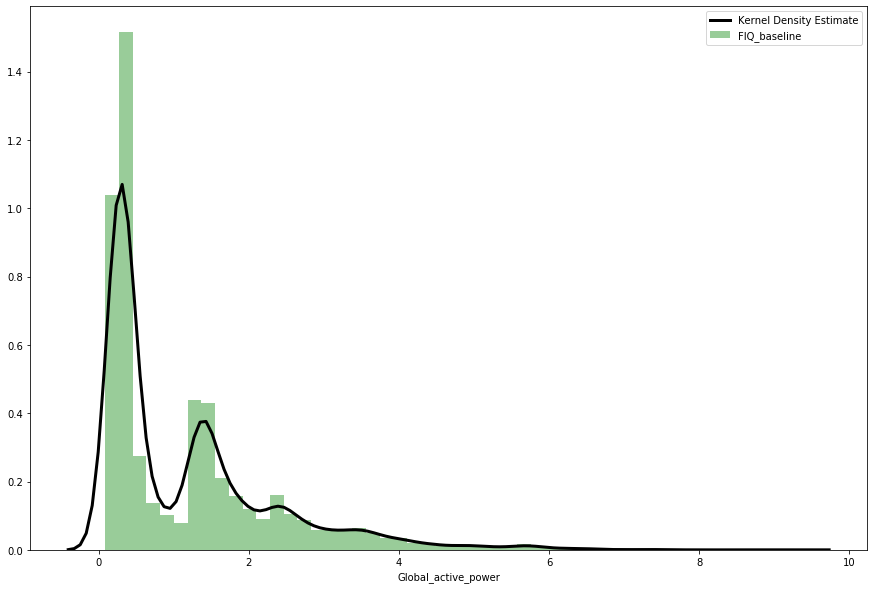

In [996]:
plt.figure(figsize = (15,10))
g = sns.distplot(df_small.Global_active_power, rug=False,kde_kws={"color": "k", "lw": 3, "label": "Kernel Density Estimate"},
             color='g', label="FIQ_baseline", ax=None);

We will now create a random sample of 100000 items for comparison

In [997]:
# Answer
df_small2 = dfcleaned.sample(n=100000, random_state=1)


Plotting the 10K random sample versus the 100K random sample as below confirms that working with 10K samples gives a fair representation of the data. The mean, variance, distribution and outliers observed are very close to each other in both Box-Plots. 

[Text(0.5, 0, 'Sample 100K rows')]

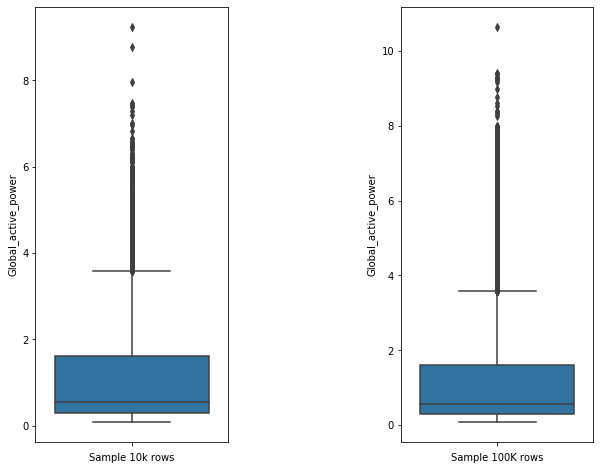

In [998]:
f, axes = plt.subplots(1,2, figsize=(10,8))  #Create four box plots
plt.subplots_adjust(wspace = 0.9)  # Increase spacing between boxes

#Plot 3 Boxplots for the different surface areas and last one as Total Surface area
box_plot1 = sns.boxplot(x='Global_active_power',data=df_small,orient='v', ax=axes[0] )
box_plot1.set(xlabel='Sample 10k rows')
box_plot2 = sns.boxplot(x='Global_active_power',data=df_small2,orient='v', ax=axes[1] )
box_plot2.set(xlabel='Sample 100K rows')

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

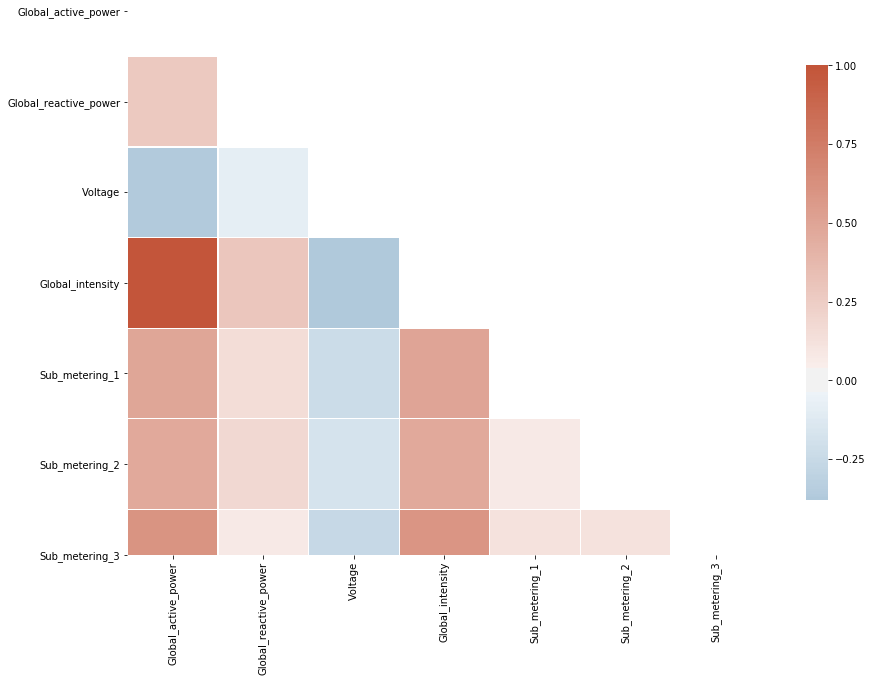

In [999]:
corr = df_small.corr()  #Calculate correlation factors between variables 

# Generate a mask for the upper triangle - display only one side of the heatmap 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,  
            linewidths=.2,                   # set linewidth between entries in matrix
           cbar_kws={"shrink": 0.8})           # set length of legend on right

There is a strong correlation between Global_Active_Power and Global_Intensity and also between Global_Active_Power and Sub_metering_3.   GA_Power and GA_Intensity are measures of Power in KwH and Current in Ampere,  which are always related, the more Current that is drawn in a electrical circuit the higher the KwH usage will be. 

Sub_meter_3 measures the usage of a Electric Water heater and Air-conditioner. Those are the biggest energy consumers in a household and hence show a string relation to the Global_Active_Energy consumed

> global_active_power: household global minute-averaged active power (in kilowatt)

> global_intensity: household global minute-averaged current intensity (in ampere)

> sub_metering_3: (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

There is a very weak relation between Global_Reactive_Power and Voltage,  we will also look in to this and plot the relations

In [1000]:
#Print the exact correlation coefficient between Global_active_power and Global_intensity
print(stats.pearsonr(df_small['Global_active_power'], df_small['Global_intensity']))

(0.9989497556973747, 0.0)


Correlation factor is 0.998 so there is a very high correlation between Global_active_power and Global_intensity.
We will now create a scatter plot to show the correlation and fit a line of regresion 

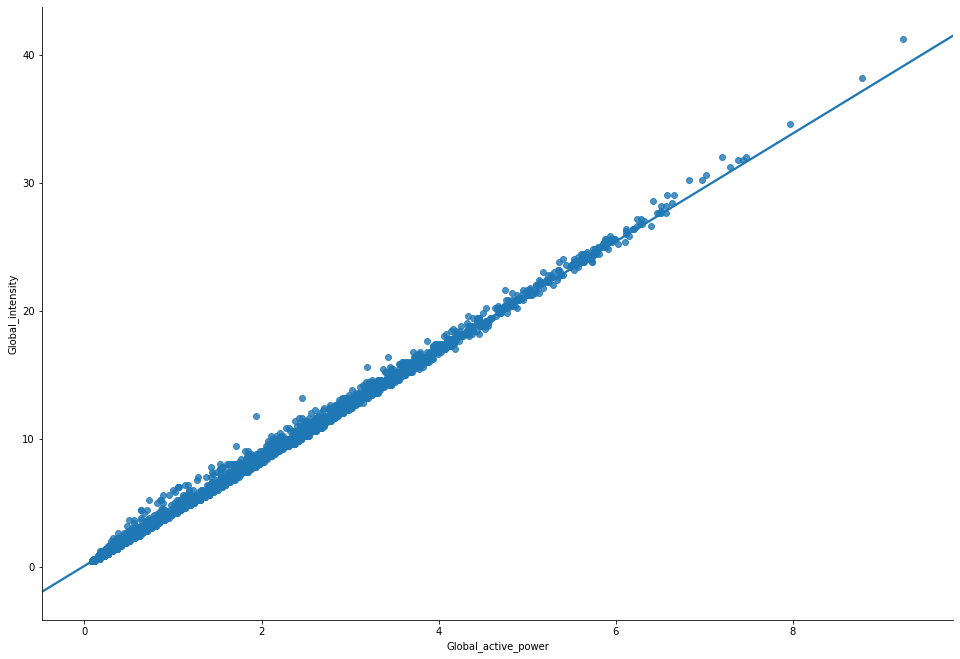

In [1001]:
g = sns.lmplot('Global_active_power',   # x-axis
               'Global_intensity',        # y-axis
               data=df_small,        # dataframe
               fit_reg=True )     # fit regression line

g.fig.set_size_inches(15,10)     # set the size of the figure

Based on the correlation heatmap we did earlier, there also appears to be a correlation between Global_active_power and Sub_metering_3.  Let's calculate the coefficient for this:

In [1002]:
#Print the correlation coefficient between Global_active_power and Sub_metering_3
print(stats.pearsonr(df_small['Global_active_power'], df_small['Sub_metering_3']))

(0.604794649209684, 0.0)


We will now create a scatter plot to show the correlation and fit a line of regresion 

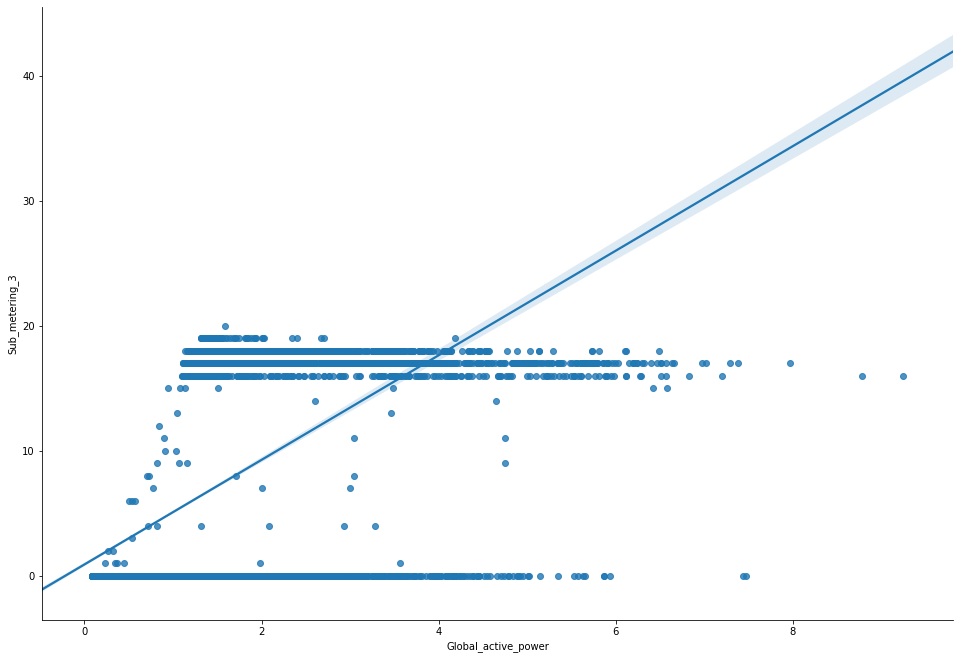

In [1003]:
g = sns.lmplot('Global_active_power',   # x-axis
               'Sub_metering_3',        # y-axis
               data=df_small,        # dataframe
               fit_reg=True )     # fit regression line

g.fig.set_size_inches(15,10)     # set the size of the figure

We will now take a look at the relation between Global_Reactive_Power and Voltage and find this to be at -0.09 which is shows a negative relation. 

In [1004]:
#Print the exact correlation coefficient between Global_active_power and Global_intensity
print(stats.pearsonr(df_small['Global_reactive_power'], df_small['Voltage']))

(-0.08802715599101585, 1.1575722503785995e-18)


Let's have a look at a scatter plot to show negative correlation by means of plotting regression line on scatterplot

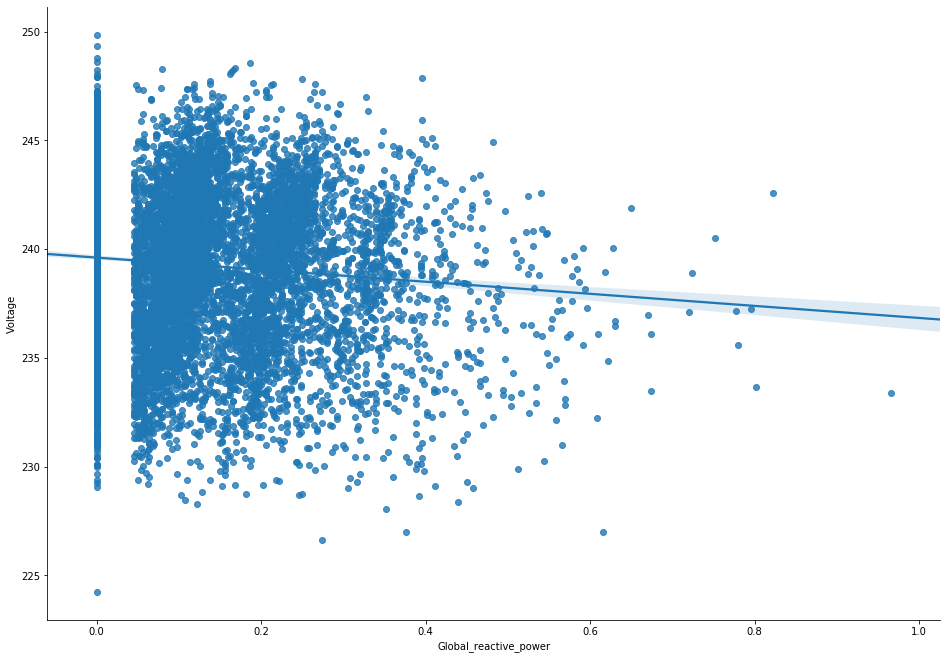

In [1005]:
g = sns.lmplot('Global_reactive_power',   # x-axis
               'Voltage',        # y-axis
               data=df_small,        # dataframe
               fit_reg=True )     # fit regression line

g.fig.set_size_inches(15,10)     # set the size of the figure

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

We will build the model on the sampled set of data which we created earlier on, df_small. 
The folling steps are used to build the model:

    Initialize the model - instantiating a model
    Train (fit) the model - using some training data to find model parameters. In the case of linear regression, this is finding the line of best fit
    Score the model - assessing how well it does
    


In [1006]:
# Build a simple model and find parameters, as well as the R-Squared Value
lr1 = linear_model.LinearRegression()

In [1007]:
INPUT = df_small[['Global_intensity']].values #Create an array of inputs

In [1008]:
lr1.fit(X = INPUT,y = df_small.Global_active_power) #Train the model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1009]:
# We can extract the model parameters:
print ("Intercept: ", lr1.intercept_) #c
print ("Coefficient: ",lr1.coef_) #m

Intercept:  -0.009714832732138357
Coefficient:  [0.23615679]


In [1010]:
print ('Simple regression model score\t', lr1.score(INPUT, df_small.Global_active_power))

Simple regression model score	 0.9979006144078445


The R-Squared measure, or Model Scores 0.998 which is a very high score, the closer to 1 the better the model is doing. We can thus state that by giving Global_Intensity as an input variable, the model will be able to accurately score the Global_Active_power at 99.7%  

## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

We will be working with the previosuly created df_small dataset which contains 10000 random samples out of the total dataset. 

### Answer:

In [1011]:
#Converting variables to an array or arrays
Sub_metering_1 = df_small[['Sub_metering_1']].values
Sub_metering_2 = df_small[['Sub_metering_2']].values
Sub_metering_3 = df_small[['Sub_metering_3']].values
Global_reactive_power = df_small[['Global_reactive_power']].values


After trying to pass different variables and training the model, I found the best R-score with passing the variables as per below

In [1012]:
#Setting up the input data for our linear regression machine learning model
INPUT2 = df_small[['Sub_metering_3','Sub_metering_2','Sub_metering_1','Global_reactive_power', 'Voltage',]].values #Create an array of inputs

In [1013]:
mlr1 = linear_model.LinearRegression()
mlr1.fit(X = INPUT2,y = df_small.Global_active_power)

# intercept + coef
print("Intercept: ", mlr1.intercept_)
print("Coef",mlr1.coef_)

Intercept:  7.4968911436463195
Coef [ 0.07051065  0.06142843  0.06406479  1.17655499 -0.02959342]


In [1014]:
#Training our model
mlr1.fit(X = INPUT2,y = df_small.Global_active_power)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In the next step we are running te model on the complete dataset and calculate the R-score on that which comes to 0.699 

In [1015]:
COMPLETEDATASET = dfcleaned[['Sub_metering_3','Sub_metering_2','Sub_metering_1','Global_reactive_power', 'Voltage',]].values
print ('Multiple regression model score\t', mlr1.score(COMPLETEDATASET, dfcleaned.Global_active_power))

Multiple regression model score	 0.6991031410422651


In the following plots we have a look at the Observed versus predicted scores for some of the different Input variables we have used.

> Predicting Global_active_power based on readings of Sub_metering_3 seems to come the closest however still not close to predicting the right values in most cases.  As we have seen previously Sub_Meter_3 has the highest mean value and thus metering the highest power consumption in the household compared to the other meters. 

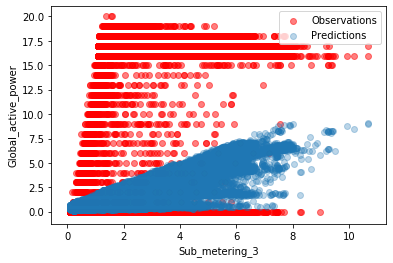

In [1016]:
#Creating a plot to compare Observed and predicted values for Global_Active_Power based on sub_metering_3 
plt.scatter(dfcleaned.Global_active_power, dfcleaned.Sub_metering_3,  c="r", alpha=0.5,label="Observations") # Actual values
plt.scatter(dfcleaned.Global_active_power, [mlr1.predict([x]) for x in COMPLETEDATASET], alpha=0.3, label="Predictions"); # Predicted values
plt.xlabel('Sub_metering_3')
plt.ylabel('Global_active_power')
plt.legend()

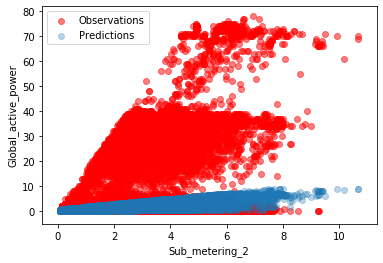

In [1017]:
#Creating a plot to compare Observed and predicted values for Global_Active_Power based on sub_metering_2 
plt.scatter(dfcleaned.Global_active_power, dfcleaned.Sub_metering_2,  c="r", alpha=0.5,label="Observations") # Actual values
plt.scatter(dfcleaned.Global_active_power, [mlr1.predict([x]) for x in COMPLETEDATASET], alpha=0.3, label="Predictions"); # Predicted values
plt.xlabel('Sub_metering_2')
plt.ylabel('Global_active_power')
plt.legend()

Trying a 3D plot .. however not there yet... 

Text(0.5, 0, 'Sub_metering_3')

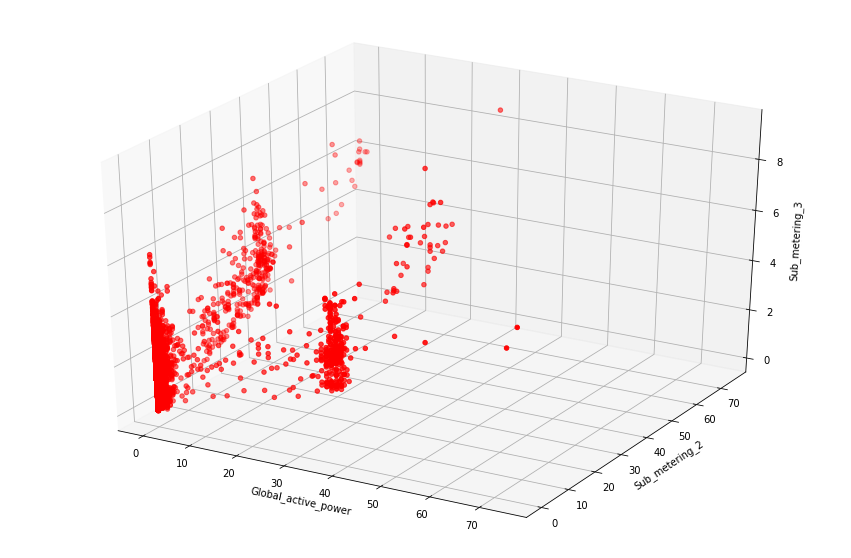

In [1018]:
fig = plt.figure()
fig.set_size_inches(15,10)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_small.Sub_metering_1, df_small.Sub_metering_2, df_small.Global_active_power,  c='r', marker='o')

xx, yy = np.meshgrid(df_small.Sub_metering_1, df_small.Global_active_power)

#exog = pd.core.frame.DataFrame({'df_small.Sub_metering_2':xx.ravel(),'df_small.Global_active_power':yy.ravel()})
out = mlr1.predict(INPUT2)
#ax.plot_surface(xx, yy, out.reshape(xx.shape), color='r')

ax.set_xlabel('Global_active_power')
ax.set_ylabel('Sub_metering_2')
ax.set_zlabel('Sub_metering_3')

#plt.show()

## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

In [1019]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [1020]:
#Adding a new column and populating with 1 when Kitchen power is higher then Laundry room and 0 if else

df_small['Kitchpower'] = np.where((df_small['Sub_metering_1'] > df_small['Sub_metering_2']),[1],[0])
df_small.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_name,Kitchpower
223686,2007-05-06 08:06:00,1.492,0.284,231.93,6.4,0.0,1.0,16.0,Sunday,0
69026,2007-02-17 22:26:00,3.952,0.100,237.63,16.6,0.0,0.0,0.0,Saturday,0
30894,2007-01-22 10:54:00,1.280,0.000,240.14,5.2,0.0,0.0,18.0,Monday,0
224554,2007-05-06 22:34:00,3.258,0.228,235.72,13.8,0.0,1.0,0.0,Sunday,0
120122,2007-03-25 10:02:00,2.480,0.170,237.29,10.4,0.0,0.0,0.0,Sunday,0


In [1021]:
INPUT = df_small[['Sub_metering_3']].values #Create an array of inputs

#Model using logistic regression
model = linear_model.LogisticRegression()
model.fit(X = INPUT,y =  df_small.Kitchpower)

# Modelshave a score method, but it's different depending on the type of model. In the case of logistic regression
# the score is the mean accuracy - how often it gets it right
print("Score: ", model.score(INPUT, df_small.Kitchpower))


Score:  0.9296


C:\Users\100008706\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


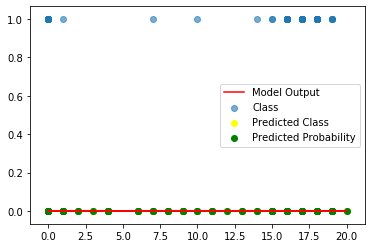

In [1022]:
plt.scatter(INPUT, df_small.Kitchpower, alpha=0.6, label='Class') # Plot the data (looking just at input 1)
plt.plot(INPUT, model.predict(INPUT), label='Model Output', c='Red') # Plot the predictions
plt.scatter(INPUT, [int(p>0.5) for p in model.predict(INPUT)], label='Predicted Class', c='yellow') # Plot the predictions
plt.scatter(INPUT, model.predict(INPUT).clip(0, 1), label='Predicted Probability', c='green') # Plot the predictions
plt.legend()

In [1023]:
#Having a look at the accuracy score of our model - this is at 92.96 % accurate for Logistic Regression using linear functions
true_values = df_small.Kitchpower
predicted_class = [int(p>0.5) for p in model.predict(INPUT)]
print('Accuracy: ', accuracy_score(true_values, predicted_class)*100, '%')

Accuracy:  92.96 %


In [1024]:
# Create and fit the model for LogistRegression 
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(INPUT, df_small.Kitchpower)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1025]:
logistic_model.predict([[0.3]])[0] # The predicted class is returned by .predict()

0

In [1026]:
logistic_model.predict_proba([[0.3]])[0] # predict_proba() gives us the probabilities for each class

array([0.95985795, 0.04014205])

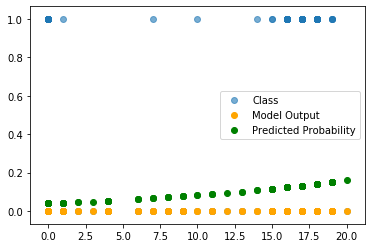

In [1027]:
plt.scatter(INPUT, df_small.Kitchpower, alpha=0.6, label='Class') # Plot the data (looking just at input 1)
plt.scatter(INPUT, logistic_model.predict(INPUT), label='Model Output', c='Orange') # Plot the predictions
probabilities = [prob[1] for prob in logistic_model.predict_proba(INPUT)] # Probability of class 1
plt.scatter(INPUT, probabilities, label='Predicted Probability', c='Green') # Plot the probabilities
plt.legend()

In [1028]:
# Examine the model output for a given input - for this example the model got ot wrong! 
print('Input:', INPUT[15], '( true class:', df_small[['Kitchpower']].values[15], ')')
print('Predicted class:', logistic_model.predict(INPUT[0].reshape(1, -1)))
print('Predicted class probabilities:', logistic_model.predict_proba(INPUT[0].reshape(1, -1)))

Input: [0.] ( true class: [1] )
Predicted class: [0]
Predicted class probabilities: [[0.87800743 0.12199257]]


In [1029]:
# One more time,  examine the model output for a given input - for this example the model got it right! 
print('Input:', INPUT[0], '( true class:', df_small[['Kitchpower']].values[0], ')')
print('Predicted class:', logistic_model.predict(INPUT[0].reshape(1, -1)))
print('Predicted class probabilities:', logistic_model.predict_proba(INPUT[0].reshape(1, -1)))

Input: [16.] ( true class: [0] )
Predicted class: [0]
Predicted class probabilities: [[0.87800743 0.12199257]]


The model came in with a high score, 92% for Linear Logistic and 96% for Logistic regression. Based on that i think the model can be very usefulll in predicting submeter_3 based on differences betwen Kitchen and Laundry usage. 

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?

Which sub-metering zone used the most power?

In [1038]:
#Set date_time column as index 
df_small.index = df_small['Date_Time']

The Kitchen mean value is: 1.4011
The Laundry mean value is: 1.6772
The electric water-heater and an air-conditioner mean value is: 5.7313


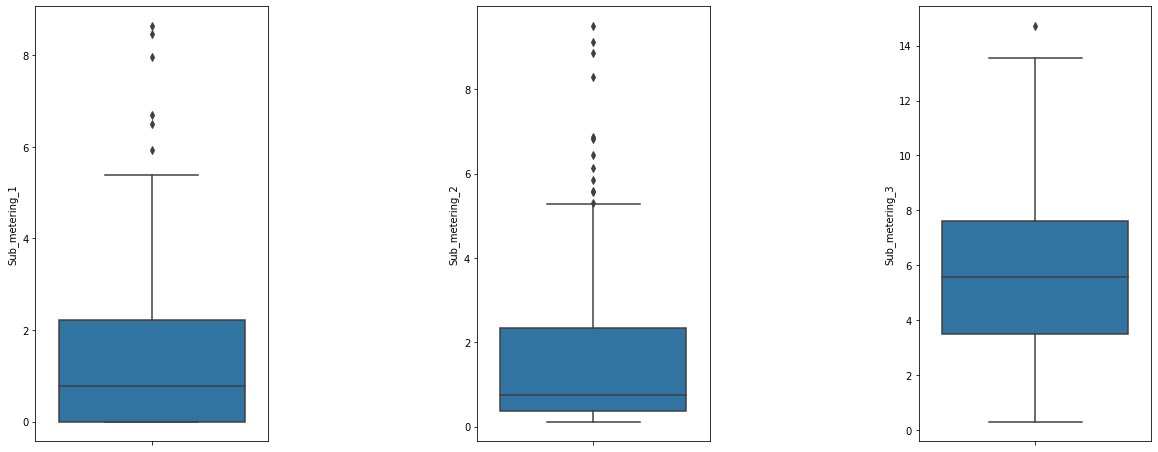

In [1040]:
f, axes = plt.subplots(1,3, figsize=(20,8))  #Create four box plots
plt.subplots_adjust(wspace = 0.9)  # Increase spacing between boxes

#Plot 3 Boxplots for the different surface areas and last one as Total Surface area
sns.boxplot(x='Sub_metering_1',data=df_small.resample('24H').mean(),orient='v', ax=axes[0])
sns.boxplot(x='Sub_metering_2',data=df_small.resample('24H').mean(),orient='v', ax=axes[1])
sns.boxplot(x='Sub_metering_3',data=df_small.resample('24H').mean(),orient='v', ax=axes[2])



print("The Kitchen mean value is:", df_small.Sub_metering_1.mean())
print("The Laundry mean value is:", df_small.Sub_metering_2.mean())
print("The electric water-heater and an air-conditioner mean value is:", df_small.Sub_metering_3.mean())


Based in the three box-plots above it is clear that the most power is used by Sub_Meter_3 which has a avergae mean of 5.7 Kw .  We have sliced the metering set values into averaged 24H intervals to have better readability of the plot's.  There does appear to be bigger more outliers on the meter 1 and meter 2 which will coincide with actions like switcing on the kettle, TV, washing machine or dryer.  Meter_readin_3 gives much more constant readings because it is measuring Air-con and Geyser which has a constant power usage when averaged witt much less spikes. 

In [1032]:
df_small.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_name,Kitchpower
223686,2007-05-06 08:06:00,1.492,0.284,231.93,6.4,0.0,1.0,16.0,Sunday,0
69026,2007-02-17 22:26:00,3.952,0.100,237.63,16.6,0.0,0.0,0.0,Saturday,0
30894,2007-01-22 10:54:00,1.280,0.000,240.14,5.2,0.0,0.0,18.0,Monday,0
224554,2007-05-06 22:34:00,3.258,0.228,235.72,13.8,0.0,1.0,0.0,Sunday,0
120122,2007-03-25 10:02:00,2.480,0.170,237.29,10.4,0.0,0.0,0.0,Sunday,0


How did the two small subsamples you created in the beginning (1000 rows each) differ?

[Text(0.5, 0, '1000 rows > 75K')]

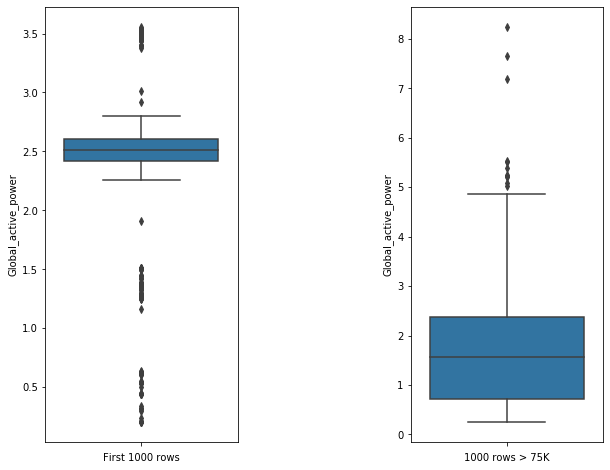

In [1041]:
f, axes = plt.subplots(1,2, figsize=(10,8))  #Create four box plots
plt.subplots_adjust(wspace = 0.9)  # Increase spacing between boxes

#Plot 3 Boxplots for the different surface areas and last one as Total Surface area
box_plot1 = sns.boxplot(x='Global_active_power',data=First1000Rows,orient='v', ax=axes[0] )
box_plot1.set(xlabel='First 1000 rows')
box_plot2 = sns.boxplot(x='Global_active_power',data=Second1000Rows,orient='v', ax=axes[1] )
box_plot2.set(xlabel='1000 rows > 75K')

Looking at the Mean values across those two different sets it is clear they are not a good representation of the entire dataset. For instance, the average or mean Global_Active_power for the first 1000 rows = 2.38 Kw while this is at 1.82Kw for the second sample set. We are looking at data which falls into one specific day for both samples. The Box-Plots above also clearly illustrates those differences and highlights the fact that these samples have a non-normal distribution and outliers in both directios. 

Does the weekly power consumption remain constant?  

> Based on the Graph below where we are looking at 12 hourly mean power consumption, plotted over the entire year, we can see that power cosumption decreases between July and December. 

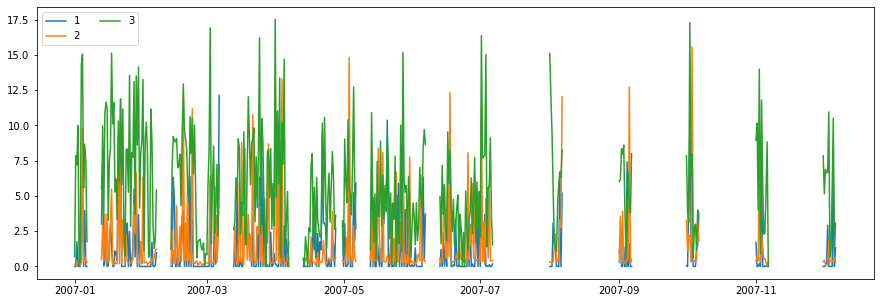

In [1112]:
year = df_small['2007-01-01':'2007-12-31'] # Looking at one year of readings

plt.figure(figsize = (15,5))
plt.plot(year.resample('12H').mean()['Sub_metering_1'])
plt.plot(year.resample('12H').mean()['Sub_metering_2'])
plt.plot(year.resample('12H').mean()['Sub_metering_3'])

plt.legend('123', ncol=2, loc='upper left');

Looking into weekly power consumption we can see there is an increased power usage for Kitchen and Laundry usage during Friday evenings and saturdays. 

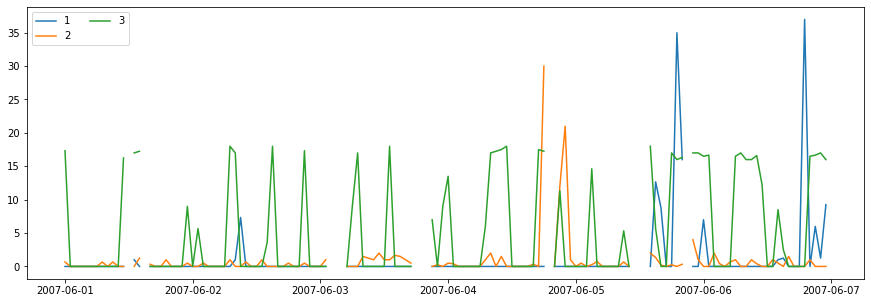

In [1119]:
week1 = df_small['2007-06-01':'2007-06-07'] # 1 week of readings
plt.figure(figsize = (15,5))
plt.plot(week1.resample('1H').mean()['Sub_metering_1'])
plt.plot(week1.resample('1H').mean()['Sub_metering_2'])
plt.plot(week1.resample('1H').mean()['Sub_metering_3'])

plt.legend('123', ncol=2, loc='upper left');